Training

In [1]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

X = tf.placeholder("float32", [None, 784])
Y = tf.placeholder("float32", [None, 10])

W = tf.Variable(tf.zeros([784, 10]))
#b = tf.Variable(tf.zeros([10]))

hypothesis = tf.nn.softmax(tf.matmul(X, W))

learning_rate = 0.01

cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), reduction_indices=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

batch_size = 100
n_epochs = 10

for epoch in range(n_epochs):
    avg_cost = 0

    total_batch = int(mnist.train.num_examples/batch_size)    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={X:batch_xs, Y:batch_ys})
        avg_cost += sess.run(cost, feed_dict={X:batch_xs, Y:batch_ys}) / total_batch
        
    if epoch % 1 == 0:
        print "Epoch:", "%04d" % (epoch+1), "cost=", "{:.9f}".format(avg_cost)

print "Optimization Finished!"

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost= 1.175696465
Epoch: 0002 cost= 0.663904176
Epoch: 0003 cost= 0.552770523
Epoch: 0004 cost= 0.499201457
Epoch: 0005 cost= 0.466445092
Epoch: 0006 cost= 0.443873275
Epoch: 0007 cost= 0.427065724
Epoch: 0008 cost= 0.414022272
Epoch: 0009 cost= 0.403402702
Epoch: 0010 cost= 0.394594977
Optimization Finished!


Validation

Lable:  [6]
Prediction:  [6]


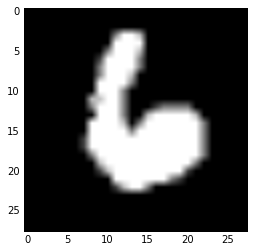

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

r = random.randint(0, mnist.test.num_examples -1)
print "Lable: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1))
print "Prediction: ", sess.run(tf.argmax(hypothesis, 1), {X:mnist.test.images[r:r+1]})

plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap="gray")
plt.show()

Test

In [5]:
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print "Accuracy: ", sess.run(accuracy, {X:mnist.test.images, Y:mnist.test.labels})

Accuracy:  0.9004
